## Crash Analysis - Bicyclist Related 
1. Count/Severity Vs. Bikers Age
2. Count/Severity Vs. Bikers Sex
3. Count/Severity Vs. Bicyclist Intoxication


In [146]:
# Dependencies and Setup
#%matplotlib notebook
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

import requests
import json
import time
import gmaps
#from us import states
from config import gkey

In [7]:
# Read the csv file containing the Bicycle Crash data for North Carolina
input_file_path = "Resources/bicycle-crash-data-chapel-hill-region.csv"
crash_data = pd.read_csv(input_file_path, delimiter = ";")

# View the csv file containing the Bicycle Crash data for North Carolina
crash_data

# There are 11266 records in 55 columns

,geo_point_2d,Ambulance,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeAlcFlg,BikeDir,BikeInjury,BikePos,BikeRace,...,RdConditio,RdConfig,RdDefects,RdFeature,RdSurface,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone
0,"33.9437020597,-78.3493385901",Yes,70,70+,No,No,With Traffic,C: Possible Injury,Travel Lane,White,...,Dry,"Two-Way, Not Divided",None,No Special Feature,Coarse Asphalt,Rural,40 - 45 MPH,No Control Present,Clear,No
1,"35.3217726,-79.0388423701",Yes,8,6-10,No,No,With Traffic,C: Possible Injury,Travel Lane,White,...,Dry,"Two-Way, Not Divided",None,T-Intersection,Smooth Asphalt,Rural,50 - 55 MPH,Stop Sign,Clear,No
2,"35.77105009,-78.6073184803",Yes,13,11-15,No,No,Facing Traffic,A: Suspected Serious Injury,Travel Lane,Black,...,Dry,"Two-Way, Divided, Positive Median Barrier",None,No Special Feature,Coarse Asphalt,Urban,30 - 35 MPH,Stop And Go Signal,Cloudy,No
3,"35.9394515202,-77.7953706304",Yes,52,50-59,No,No,Facing Traffic,C: Possible Injury,Travel Lane,Black,...,Dry,"One-Way, Not Divided",None,Four-Way Intersection,Coarse Asphalt,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No
4,"36.0927628197,-80.2653764398",Yes,27,25-29,No,No,Not Applicable,C: Possible Injury,Non-Roadway,White,...,Dry,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Urban,30 - 35 MPH,"Double Yellow Line, No Passing Zone",Clear,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11261,"34.2546581498,-77.9197554903",Yes,26,25-29,No,No,Facing Traffic,C: Possible Injury,Travel Lane,White,...,Dry,"Two-Way, Not Divided",None,No Special Feature,Coarse Asphalt,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No
11262,"35.2123611203,-80.7913412696",Yes,20,20-24,No,No,Facing Traffic,C: Possible Injury,Sidewalk / Crosswalk / Driveway Crossing,Black,...,Dry,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Urban,30 - 35 MPH,No Control Present,Cloudy,No
11263,"35.64331907,-80.4828223001",Yes,11,11-15,No,No,Facing Traffic,C: Possible Injury,Travel Lane,Unknown/Missing,...,Dry,"Two-Way, Divided, Unprotected Median",None,No Special Feature,Smooth Asphalt,Urban,40 - 45 MPH,No Control Present,Clear,No
11264,"34.1935523204,-77.9356315301",No,60,60-69,No,No,With Traffic,C: Possible Injury,Travel Lane,White,...,Dry,"Two-Way, Not Divided",None,No Special Feature,Coarse Asphalt,Urban,40 - 45 MPH,No Control Present,Clear,No


In [8]:
# Clear rows with missing data in any column
clean_crash_data = crash_data.dropna(how='any')
clean_crash_data
# None of the records were deleted so none of the rows have missing data

,geo_point_2d,Ambulance,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeAlcFlg,BikeDir,BikeInjury,BikePos,BikeRace,...,RdConditio,RdConfig,RdDefects,RdFeature,RdSurface,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone
0,"33.9437020597,-78.3493385901",Yes,70,70+,No,No,With Traffic,C: Possible Injury,Travel Lane,White,...,Dry,"Two-Way, Not Divided",None,No Special Feature,Coarse Asphalt,Rural,40 - 45 MPH,No Control Present,Clear,No
1,"35.3217726,-79.0388423701",Yes,8,6-10,No,No,With Traffic,C: Possible Injury,Travel Lane,White,...,Dry,"Two-Way, Not Divided",None,T-Intersection,Smooth Asphalt,Rural,50 - 55 MPH,Stop Sign,Clear,No
2,"35.77105009,-78.6073184803",Yes,13,11-15,No,No,Facing Traffic,A: Suspected Serious Injury,Travel Lane,Black,...,Dry,"Two-Way, Divided, Positive Median Barrier",None,No Special Feature,Coarse Asphalt,Urban,30 - 35 MPH,Stop And Go Signal,Cloudy,No
3,"35.9394515202,-77.7953706304",Yes,52,50-59,No,No,Facing Traffic,C: Possible Injury,Travel Lane,Black,...,Dry,"One-Way, Not Divided",None,Four-Way Intersection,Coarse Asphalt,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No
4,"36.0927628197,-80.2653764398",Yes,27,25-29,No,No,Not Applicable,C: Possible Injury,Non-Roadway,White,...,Dry,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Urban,30 - 35 MPH,"Double Yellow Line, No Passing Zone",Clear,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11261,"34.2546581498,-77.9197554903",Yes,26,25-29,No,No,Facing Traffic,C: Possible Injury,Travel Lane,White,...,Dry,"Two-Way, Not Divided",None,No Special Feature,Coarse Asphalt,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No
11262,"35.2123611203,-80.7913412696",Yes,20,20-24,No,No,Facing Traffic,C: Possible Injury,Sidewalk / Crosswalk / Driveway Crossing,Black,...,Dry,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Urban,30 - 35 MPH,No Control Present,Cloudy,No
11263,"35.64331907,-80.4828223001",Yes,11,11-15,No,No,Facing Traffic,C: Possible Injury,Travel Lane,Unknown/Missing,...,Dry,"Two-Way, Divided, Unprotected Median",None,No Special Feature,Smooth Asphalt,Urban,40 - 45 MPH,No Control Present,Clear,No
11264,"34.1935523204,-77.9356315301",No,60,60-69,No,No,With Traffic,C: Possible Injury,Travel Lane,White,...,Dry,"Two-Way, Not Divided",None,No Special Feature,Coarse Asphalt,Urban,40 - 45 MPH,No Control Present,Clear,No


### Cleaning the Crash Group data

In [39]:
# Crashes by Crash Gpr
crashes_by_crashgrp = crash_data.groupby(["CrashGrp"])["geo_point_2d"].count()
crashes_by_crashgrp

# Needs cleaning

CrashGrp
Backing Vehicle                                               88
Bicyclist Failed to Yield - Midblock                         689
Bicyclist Failed to Yield - Sign-Controlled Intersection     642
Bicyclist Failed to Yield - Signalized Intersection          478
Bicyclist Failed to Yield—Midblock                            50
Bicyclist Failed to Yield—Sign-Controlled Intersection        37
Bicyclist Failed to Yield—Signalized Intersection             52
Bicyclist Left Turn / Merge                                  461
Bicyclist Left Turn/Merge                                     42
Bicyclist Overtaking Motorist                                232
Bicyclist Right Turn / Merge                                 128
Bicyclist Right Turn/Merge                                     6
Crossing Paths - Other Circumstances                         616
Crossing Paths—Other Circumstances                            58
Head-On                                                      300
Loss of Control 

In [42]:
# Cleaning Crash Group
crash_data["CrashGrp"] = crash_data["CrashGrp"].replace(
    {"Bicyclist Failed to Yield—Midblock": "Bicyclist Failed to Yield - Midblock",
    "Bicyclist Failed to Yield—Sign-Controlled Intersection": "Bicyclist Failed to Yield - Sign-Controlled Intersection",
    "Bicyclist Failed to Yield—Signalized Intersection": "Bicyclist Failed to Yield - Signalized Intersection",
    "Bicyclist Left Turn/Merge": "Bicyclist Left Turn / Merge",
    "Bicyclist Right Turn/Merge": "Bicyclist Right Turn / Merge",
    "Crossing Paths—Other Circumstances": "Crossing Paths - Other Circumstances",
    "Loss of Control/Turning Error": "Loss of Control / Turning Error",
    "Motorist Failed to Yield—Midblock": "Motorist Failed to Yield - Midblock",
    "Motorist Failed to Yield—Sign-Controlled Intersection": "Motorist Failed to Yield - Sign-Controlled Intersection",
    "Motorist Failed to Yield—Signalized Intersection": "Motorist Failed to Yield - Signalized Intersection",
    "Motorist Left Turn/Merge": "Motorist Left Turn / Merge",
     "Motorist Right Turn/Merge": "Motorist Right Turn / Merge",
     "Nonroadway": "Non-Roadway",
     "Other/Unknown—Insufficient Details": "Other / Unknown - Insufficient Details",
     "Other/Unusual Circumstances": "Other / Unusual Circumstances",
     "Parallel Paths—Other Circumstances": "Parallel Paths - Other Circumstances"
    })
crash_data["CrashGrp"]

0                                          Backing Vehicle
1                          Loss of Control / Turning Error
2        Bicyclist Failed to Yield - Signalized Interse...
3        Bicyclist Failed to Yield - Signalized Interse...
4                     Bicyclist Failed to Yield - Midblock
                               ...                        
11261                          Motorist Right Turn / Merge
11262                 Crossing Paths - Other Circumstances
11263                 Bicyclist Failed to Yield - Midblock
11264                        Motorist Overtaking Bicyclist
11265                        Motorist Overtaking Bicyclist
Name: CrashGrp, Length: 11266, dtype: object

In [45]:
# Check if all values were replaced correctly
# Crashes by Crash Gpr
crashes_by_crashgrp = crash_data.groupby(["CrashGrp"])["geo_point_2d"].count()
crashes_by_crashgrp.sort_values(ascending=False)

CrashGrp
Motorist Overtaking Bicyclist                               2207
Motorist Failed to Yield - Sign-Controlled Intersection     1073
Motorist Left Turn / Merge                                   978
Motorist Failed to Yield - Midblock                          824
Bicyclist Failed to Yield - Midblock                         739
Bicyclist Failed to Yield - Sign-Controlled Intersection     679
Crossing Paths - Other Circumstances                         674
Motorist Right Turn / Merge                                  585
Bicyclist Failed to Yield - Signalized Intersection          530
Non-Roadway                                                  503
Bicyclist Left Turn / Merge                                  503
Loss of Control / Turning Error                              477
Motorist Failed to Yield - Signalized Intersection           373
Head-On                                                      300
Bicyclist Overtaking Motorist                                232
Parallel Paths -

In [46]:
# Added 2 columns for latitude and longitude by splitting the "geo_point_2d" column for use in mapping
# Adding two new columns to the existing dataframe. 
# bydefault splitting is done on the basis of single space. 
crash_data[["Latitude","Longitude"]] = crash_data["geo_point_2d"].str.split(',',expand=True) 
crash_data

,geo_point_2d,Ambulance,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeAlcFlg,BikeDir,BikeInjury,BikePos,BikeRace,...,RdDefects,RdFeature,RdSurface,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,Latitude,Longitude
0,"33.9437020597,-78.3493385901",Yes,70,70+,No,No,With Traffic,C: Possible Injury,Travel Lane,White,...,None,No Special Feature,Coarse Asphalt,Rural,40 - 45 MPH,No Control Present,Clear,No,33.9437020597,-78.3493385901
1,"35.3217726,-79.0388423701",Yes,8,6-10,No,No,With Traffic,C: Possible Injury,Travel Lane,White,...,None,T-Intersection,Smooth Asphalt,Rural,50 - 55 MPH,Stop Sign,Clear,No,35.3217726,-79.0388423701
2,"35.77105009,-78.6073184803",Yes,13,11-15,No,No,Facing Traffic,A: Suspected Serious Injury,Travel Lane,Black,...,None,No Special Feature,Coarse Asphalt,Urban,30 - 35 MPH,Stop And Go Signal,Cloudy,No,35.77105009,-78.6073184803
3,"35.9394515202,-77.7953706304",Yes,52,50-59,No,No,Facing Traffic,C: Possible Injury,Travel Lane,Black,...,None,Four-Way Intersection,Coarse Asphalt,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No,35.9394515202,-77.7953706304
4,"36.0927628197,-80.2653764398",Yes,27,25-29,No,No,Not Applicable,C: Possible Injury,Non-Roadway,White,...,None,No Special Feature,Smooth Asphalt,Urban,30 - 35 MPH,"Double Yellow Line, No Passing Zone",Clear,No,36.0927628197,-80.2653764398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11261,"34.2546581498,-77.9197554903",Yes,26,25-29,No,No,Facing Traffic,C: Possible Injury,Travel Lane,White,...,None,No Special Feature,Coarse Asphalt,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No,34.2546581498,-77.9197554903
11262,"35.2123611203,-80.7913412696",Yes,20,20-24,No,No,Facing Traffic,C: Possible Injury,Sidewalk / Crosswalk / Driveway Crossing,Black,...,None,No Special Feature,Smooth Asphalt,Urban,30 - 35 MPH,No Control Present,Cloudy,No,35.2123611203,-80.7913412696
11263,"35.64331907,-80.4828223001",Yes,11,11-15,No,No,Facing Traffic,C: Possible Injury,Travel Lane,Unknown/Missing,...,None,No Special Feature,Smooth Asphalt,Urban,40 - 45 MPH,No Control Present,Clear,No,35.64331907,-80.4828223001
11264,"34.1935523204,-77.9356315301",No,60,60-69,No,No,With Traffic,C: Possible Injury,Travel Lane,White,...,None,No Special Feature,Coarse Asphalt,Urban,40 - 45 MPH,No Control Present,Clear,No,34.1935523204,-77.9356315301


# # Reviewing Columns of Interest

In [90]:
# Number of cities included in the study
county_count = crash_data["County"].nunique()
city_count = crash_data["City"].nunique()
total_crash_count = severity_df["Number of Crashes"].sum()

print(f"Total number of Bicycle Crashes in North carolina (2007-2019) = {total_crash_count}")
print (f"Number of Counties included in the study: {county_count}")
print (f"Number of Cities included in the study: {city_count}")

Total number of Bicycle Crashes in North carolina (2007-2019) = 11266
Number of Counties included in the study: 100
Number of Cities included in the study: 327


CrashYear
2007    1001
2008    1018
2009     811
2010     967
2011     899
2012    1020
2013     897
2014     850
2015     949
2016     955
2017    1000
2018     899
Name: geo_point_2d, dtype: int64
Total Crashes: 11266


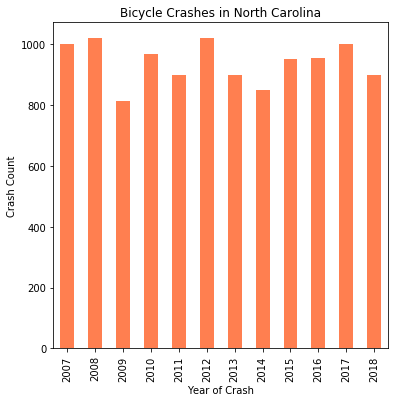

In [135]:
# Crash count grouped by Crash year
crashes_by_year = crash_data.groupby(["CrashYear"])["geo_point_2d"].count()
print(crashes_by_year)
print(f"Total Crashes: {total_crash_count}")

# Create a bar plot for crashes over time
fig, ax = plt.subplots()
ax = crashes_by_year.plot(kind='bar', figsize = (6,6), color = "coral")
ax.set_xlabel("Year of Crash")
ax.set_ylabel("Crash Count")
ax.set_title("Bicycle Crashes in North Carolina")

# Save the bar plot for crashes over time
plt.savefig("Output/CrashesOverTime.png")

# Display the bar plot for crashes over time
plt.show()

            Number of Crashes  Percent(%)
CrashMonth                               
September                1248       11.08
August                   1239       11.00
July                     1204       10.69
June                     1154       10.24
October                  1125        9.99
May                      1123        9.97
April                     975        8.65
November                  837        7.43
March                     742        6.59
December                  590        5.24
January                   516        4.58
February                  513        4.55
Total Crashes: 11266


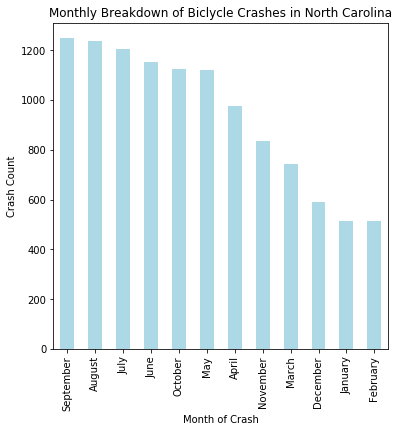

In [122]:
# Crash count grouped by Crash Month
crashes_by_month = crash_data.groupby(["CrashMonth"])["geo_point_2d"].count()
crashes_by_month = crashes_by_month.sort_values(ascending=False)

crashes_by_month_df = pd.DataFrame(crashes_by_month)
crashes_by_month_df.rename(columns = {"geo_point_2d": "Number of Crashes"}, inplace = True)

monthly_total = crashes_by_month_df["Number of Crashes"].sum()
crashes_by_month_df["Percent(%)"] = ""

for row in range(len(crashes_by_month_df)):
      crashes_by_month_df["Percent(%)"] = round((crashes_by_month_df["Number of Crashes"] / monthly_total)*100, 2) 

print(crashes_by_month_df)
print(f"Total Crashes: {monthly_total}")

# Create a bar plot for monthly breakdown of crashes 
fig, ax = plt.subplots()
ax = crashes_by_month.plot(kind='bar', figsize = (6,6), color = "lightblue", )
ax.set_xlabel("Month of Crash")
ax.set_ylabel("Crash Count")
ax.set_title("Monthly Breakdown of Biclycle Crashes in North Carolina")

# Save the bar plot for monthly breakdown of crashes
plt.savefig("Output/MonthlyBreakdown.png")

# Display the bar plot for monthly breakdown of crashes
plt.show()

                 Number of Crashes  Percent(%)
BikeRace                                      
White                         6178       54.84
Black                         3847       34.15
Hispanic                       603        5.35
Unknown/Missing                265        2.35
Other                          133        1.18
Native American                130        1.15
Asian                          110        0.98
Total Crashes: 11266


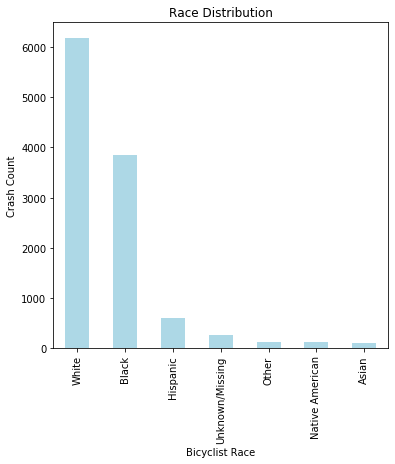

In [136]:
# Crash count grouped by Bikers Race
crashes_by_bikers_race = crash_data.groupby(["BikeRace"])["geo_point_2d"].count()
crashes_by_bikers_race = crashes_by_bikers_race.sort_values(ascending=False)

crashes_by_bikers_race_df = pd.DataFrame(crashes_by_bikers_race)
crashes_by_bikers_race_df.rename(columns = {"geo_point_2d": "Number of Crashes"}, inplace = True)

crashes_by_bikers_race_df["Percent(%)"] = ""
for row in range(len(crashes_by_month_df)):
      crashes_by_bikers_race_df["Percent(%)"] = round((crashes_by_bikers_race_df["Number of Crashes"] / total_crash_count)*100, 2) 
print(crashes_by_bikers_race_df)
print(f"Total Crashes: {total_crash_count}")

# Create a bar plot for crashes by Bikers Race 
fig, ax = plt.subplots()
ax = crashes_by_bikers_race.plot(kind='bar', figsize = (6,6), color = "lightblue", )
ax.set_xlabel("Bicyclist Race")
ax.set_ylabel("Crash Count")
ax.set_title("Race Distribution")

# Save the bar plot for crashes by Bikers Race
plt.savefig("Output/RaceDistribution.png")

# Display the bar plot for crashes by Bikers Race
plt.show()


             Number of Crashes  Percent(%)
County                                    
Wake                      1500       13.31
Mecklenburg               1421       12.61
New Hanover                767        6.81
Guilford                   741        6.58
Durham                     539        4.78
Total Crashes: 11266


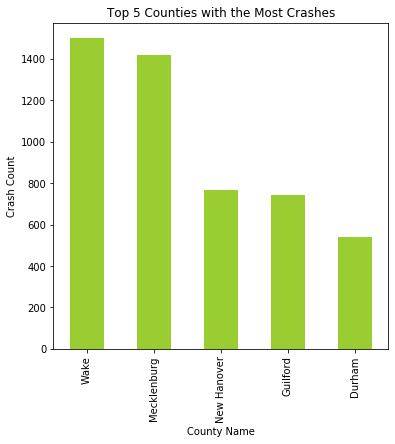

In [137]:
# Crash count grouped by County
crashes_by_county = crash_data.groupby(["County"])["geo_point_2d"].count()
crashes_by_county_df = pd.DataFrame(crashes_by_county)
crashes_by_county_df.rename(columns = {"geo_point_2d": "Number of Crashes"}, inplace = True)

crashes_by_county_df["Percent(%)"] = ""

for row in range(len(crashes_by_county_df)):
      crashes_by_county_df["Percent(%)"] = round((crashes_by_county_df["Number of Crashes"] / total_crash_count)*100, 2) 

top5_counties = crashes_by_county_df.sort_values(["Number of Crashes"], ascending=False).head()
top5_counties_df = pd.DataFrame(top5_counties)
print(top5_counties_df)
print(f"Total Crashes: {total_crash_count}")

# Create a bar plot for crashes by county 
fig, ax = plt.subplots()
ax = top5_counties["Number of Crashes"].plot(kind='bar', figsize = (6,6), color = "yellowgreen", )
ax.set_xlabel("County Name")
ax.set_ylabel("Crash Count")
ax.set_title("Top 5 Counties with the Most Crashes")

# Save the bar plot for crashes by county
plt.savefig("Output/Top5Counties.png")

# Display the bar plot for crashes by Bikers Race
plt.show()

                    Number of Crashes  Percent(%)
City                                             
None - Rural Crash               2404       21.34
Charlotte                        1284       11.40
Raleigh                          1025        9.10
Wilmington                        578        5.13
Durham                            500        4.44
Greensboro                        473        4.20
Total Crashes: 11266


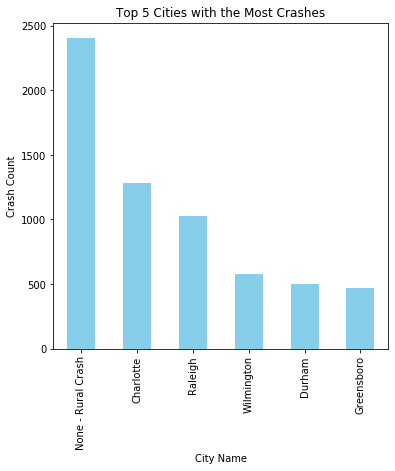

In [142]:
# Crash count grouped by City
crashes_by_city = crash_data.groupby(["City"])["geo_point_2d"].count()
crashes_by_city = crashes_by_city.sort_values(ascending=False)

top5_cities = crashes_by_city.head(6)
top5_cities_df = pd.DataFrame(top5_cities)
top5_cities_df.rename(columns = {"geo_point_2d": "Number of Crashes"}, inplace = True)

top5_cities_df["Percent(%)"] = ""
for row in range(len(top5_cities_df)):
      top5_cities_df["Percent(%)"] = round((top5_cities_df["Number of Crashes"] / total_crash_count)*100, 2) 

print(top5_cities_df)
print(f"Total Crashes: {total_crash_count}")

# Create a bar plot for crashes by City 
fig, ax = plt.subplots()
ax = top5_cities.plot(kind='bar', figsize = (6,6), color = "skyblue", )
ax.set_xlabel("City Name")
ax.set_ylabel("Crash Count")
ax.set_title("Top 5 Cities with the Most Crashes")

# Save the bar plot for crashes by City
plt.savefig("Output/Top5Cities.png")

# Display the bar plot for crashes by City
plt.show()

In [147]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

# Store 'Lat' and 'Lng' into  locations 
locations = crash_data[["Latitude", "Longitude"]].astype(float)

# Convert Poverty Rate to float and store
# HINT: be sure to handle NaN values
count_by_city = crash_data["geo_point_2d"]

#poverty_rate = census_data_complete["Poverty Rate"].astype(float)

# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=count_by_city, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

fig.add_layer(heat_layer)

fig

TraitError: 33.9437020597,-78.3493385901 is not a valid weight. Weights must be floats

         Number of Crashes  Percent(%)
BikeSex                               
Male                  9391       83.36
Female                1669       14.81
Unknown                206        1.83
Total Crashes: 11266


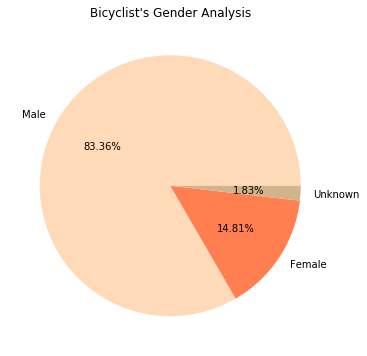

In [139]:
# Crashes by Bicyclist's Gender
crashes_by_gender = crash_data.groupby(["BikeSex"])["geo_point_2d"].count()
crashes_by_gender = crashes_by_gender.sort_values(ascending=False)

crashes_by_gender_df = pd.DataFrame(crashes_by_gender)
crashes_by_gender_df.rename(columns = {"geo_point_2d": "Number of Crashes"}, inplace = True)
crashes_by_gender_df["Percent(%)"] = ""
for row in range(len(crashes_by_gender_df)):
      crashes_by_gender_df["Percent(%)"] = round((crashes_by_gender_df["Number of Crashes"] / total_crash_count)*100, 2) 

print(crashes_by_gender_df)
print(f"Total Crashes: {total_crash_count}")

# Create a pie plot for crashes by Bicyclist's Gender
fig, ax = plt.subplots()
pie_colors = ("peachpuff", "coral", "tan")
ax = crashes_by_gender.plot(kind='pie', autopct = "%.2f%%", figsize = (6,6), colors = pie_colors)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("Bicyclist's Gender Analysis")

# Save the bar plot for crashes Bicyclist's Gender
plt.savefig("Output/BicyclistGenderDistribution.png")

# Display the bar plot for crashes Bicyclist's Gender
plt.show()

              Number of Crashes  Percent(%)
Biker Intox.                               
No                        10470       92.93
Yes                         796        7.07
Total Crashes: 11266


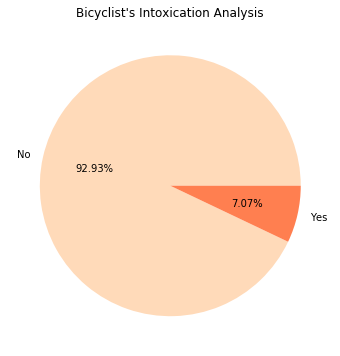

In [141]:
# Crashes where bikers were intoxicated
crashes_by_biker_intox = crash_data.groupby(["Biker Intox."])["geo_point_2d"].count()
crashes_by_biker_intox = crashes_by_biker_intox.sort_values(ascending=False)

crashes_by_biker_intox_df = pd.DataFrame(crashes_by_biker_intox)
crashes_by_biker_intox_df.rename(columns = {"geo_point_2d": "Number of Crashes"}, inplace = True)
crashes_by_biker_intox_df["Percent(%)"] = ""
for row in range(len(crashes_by_biker_intox_df)):
      crashes_by_biker_intox_df["Percent(%)"] = round((crashes_by_biker_intox_df["Number of Crashes"] / total_crash_count)*100, 2) 

print(crashes_by_biker_intox_df)
print(f"Total Crashes: {total_crash_count}")

# Create a pie plot for Crashes where bikers were intoxicated
fig, ax = plt.subplots()
pie_colors = ("peachpuff", "coral")
ax = crashes_by_biker_intox.plot(kind='pie', autopct = "%.2f%%", figsize = (6,6), colors = pie_colors)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("Bicyclist's Intoxication Analysis")

# Save the bar plot for Crashes where bikers were intoxicated
plt.savefig("Output/BicyclistIntoxication.png")

# Display the bar plot for Crashes where bikers were intoxicated
plt.show()

In [20]:
# Crashes by Locality
crashes_by_locality = crash_data.groupby(["Locality"])["geo_point_2d"].count()
crashes_by_locality

Locality
Mixed (30% To 70% Developed)    1568
Rural (<30% Developed)          1658
Urban (>70% Developed)          8040
Name: geo_point_2d, dtype: int64

In [22]:
# Crashes by Day of Week
crashes_by_weekday = crash_data.groupby(["Day of Week"])["geo_point_2d"].count()
crashes_by_weekday.sort_values(ascending=False)

Day of Week
Friday       1770
Thursday     1701
Wednesday    1697
Tuesday      1695
Monday       1624
Saturday     1503
Sunday       1276
Name: geo_point_2d, dtype: int64

HitRun
No     9605
Yes    1661
Name: geo_point_2d, dtype: int64


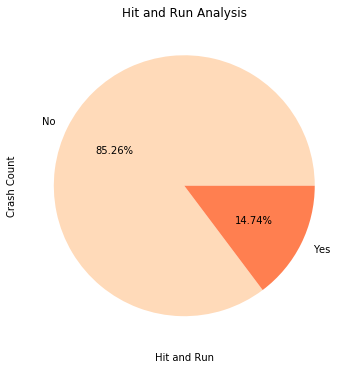

In [79]:
# Crashes by Hit or Run
crashes_by_hitrun = crash_data.groupby(["HitRun"])["geo_point_2d"].count()
print(crashes_by_hitrun.sort_values(ascending=False))

# Create a pie plot for Hit n Run
fig, ax = plt.subplots()
pie_colors = ("peachpuff", "coral")
ax = crashes_by_hitrun.plot(kind='pie', autopct = "%.2f%%", figsize = (6,6), colors = pie_colors)
ax.set_xlabel("Hit and Run")
ax.set_ylabel("Crash Count")
ax.set_title("Hit and Run Analysis")

# Save the bar plot for crashes over time
plt.savefig("Output/HitnRunCrashes.png")

# Display the bar plot for crashes over time
plt.show()


## Plots of Interest 

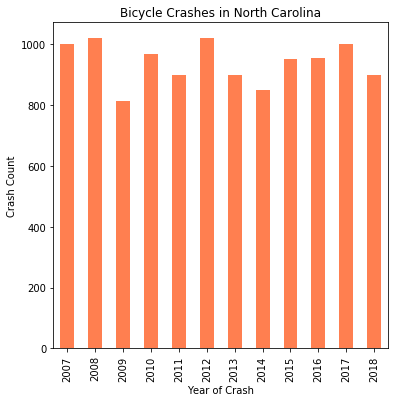

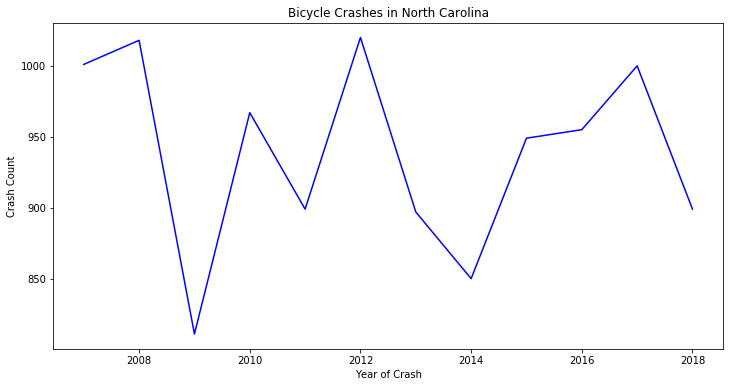

In [64]:
# Create a trendline for crashes over time
# Generate the bar plot for crashes over time
fig, ax = plt.subplots()
ax = crashes_by_year.plot(kind='line', figsize = (12,6), color = "blue")
ax.set_xlabel("Year of Crash")
ax.set_ylabel("Crash Count")
ax.set_title("Bicycle Crashes in North Carolina")

# Save the bar plot for crashes over time
plt.savefig("Output/YoYCrashTrend.png")

# Display the bar plot for crashes over time
plt.show()

In [17]:
# Sort by County, City
sorted_by_city = crash_data.groupby(["County", "City"])["geo_point_2d"].count()
sorted_by_city

County    City              
Alamance  Alamance               1
          Burlington            79
          Elon                   6
          Elon College           6
          Gibsonville            2
                                ..
Yadkin    Boonville              1
          Jonesville             3
          None - Rural Crash     7
          Yadkinville            2
Yancey    None - Rural Crash     4
Name: geo_point_2d, Length: 430, dtype: int64

# # Bicyclist Age Analysis

In [25]:
# Identify the count of unique age group values
agegroup_unique_values = crash_data["BikeAgeGrp"].unique()
agegroup_unique_values

array(['70+', '6-10', '11-15', '50-59', '25-29', 'Unknown', '60-69',
       '30-39', '40-49', '20-24', '0-5', '16-19'], dtype=object)

In [26]:
# Identify all the values for age
age_unique_values = crash_data["BikeAge"].unique()
age_unique_values

array(['70', '8', '13', '52', '27', '999', '69', '57', '39', '33', '14',
       '45', '24', '38', '28', '30', '22', '46', '56', '48', '1', '65',
       '51', '61', '47', '72', '16', '64', '19', '35', '58', '31', '12',
       '53', '23', '49', '36', '60', '20', '34', '44', '37', '18', '9',
       '6', '26', '11', '7', '4', '17', '50', '41', '10', '42', '40', '5',
       '25', '70+', '15', '21', '29', '54', '43', '55', '66', '79', '63',
       '81', '68', '73', '82', '62', '75', '59', '3', '76', '32', '77',
       '67', '71', '80', '74', '87', '89', '93', '0', '84', '78', '91',
       '2', '83', '88', '90'], dtype=object)

In [27]:
# Fine number of crashes by age group
crashes_by_age = crash_data.groupby(["BikeAgeGrp"])["geo_point_2d"].count()
crashes_by_age.sort_values(ascending=False)

BikeAgeGrp
50-59      1599
40-49      1588
20-24      1392
30-39      1327
11-15      1320
16-19      1161
25-29       955
6-10        736
60-69       697
Unknown     196
70+         185
0-5         110
Name: geo_point_2d, dtype: int64

# # Severity Analysis

In [28]:
# Severity 
severity = crash_data.groupby(["CrashSevr"])["geo_point_2d"].count()
severity_df = pd.DataFrame(severity)
severity_df.rename(columns = {"geo_point_2d": "Number of Crashes"}, inplace = True)
severity_df

,Number of Crashes
CrashSevr,
A: Suspected Serious Injury,589
B: Suspected Minor Injury,4696
C: Possible Injury,4369
K: Killed,259
O: No Injury,1283
Unknown Injury,70


In [34]:
# Ceverity per year
severity_year = crash_data.groupby(["CrashSevr", "CrashYear"])["geo_point_2d"].count()
severity_year.head(60)

CrashSevr                    CrashYear
A: Suspected Serious Injury  2007          68
                             2008          50
                             2009          45
                             2010          43
                             2011          50
                             2012          39
                             2013          40
                             2014          39
                             2015          39
                             2016          45
                             2017          59
                             2018          72
B: Suspected Minor Injury    2007         432
                             2008         430
                             2009         352
                             2010         447
                             2011         352
                             2012         417
                             2013         345
                             2014         355
                             2015        

In [37]:
# Severity per year
severity_by_year = crash_data.groupby(["CrashYear", "CrashSevr"])["geo_point_2d"].count()
severity_by_year.head(60)

CrashYear  CrashSevr                  
2007       A: Suspected Serious Injury     68
           B: Suspected Minor Injury      432
           C: Possible Injury             365
           K: Killed                       17
           O: No Injury                   112
           Unknown Injury                   7
2008       A: Suspected Serious Injury     50
           B: Suspected Minor Injury      430
           C: Possible Injury             403
           K: Killed                       29
           O: No Injury                   104
           Unknown Injury                   2
2009       A: Suspected Serious Injury     45
           B: Suspected Minor Injury      352
           C: Possible Injury             328
           K: Killed                       14
           O: No Injury                    68
           Unknown Injury                   4
2010       A: Suspected Serious Injury     43
           B: Suspected Minor Injury      447
           C: Possible Injury            

In [142]:
total_crash_count = severity_df["Number of Crashes"].sum()
severity_df["Percent (%)"] = ""

print(f"Total number of Bicycle Crashes in North carolina (2007-2019) = {total_crash_count}")
for row in range(len(severity_df)):
      severity_df["Percent (%)"] = round((severity_df["Number of Crashes"] / total_crash_count)*100, 2) 
severity_df.sort_values("Percent (%)", ascending=False)

Total number of Bicycle Crashes in North carolina (2007-2019) = 11266


,Number of Crashes,Percent (%)
CrashSevr,,
B: Suspected Minor Injury,4696,41.68
C: Possible Injury,4369,38.78
O: No Injury,1283,11.39
A: Suspected Serious Injury,589,5.23
K: Killed,259,2.30
Unknown Injury,70,0.62


In [1]:
# Generate pie plot for Severity
# Define plot options
#colors = ("red", "orange", "salmon", "gold", "bisque", "linen")
plt.title("Severity of Bicycle Crashes in North Carolina (2007 - 2019)")

# Generate Pandas Pie plot
plt.pie(severity, autopct='%1.1f%%')
plt.show()


# Generate the bar plot for crashe severity
# plt.title("Severity of Bicycle Crashes in North Carolina (2007-2019)")
# plt.xlabel("Year")
# plt.ylabel("Number of Bicycle Crashes in North Carolina")
# severity_df.plot(kind='bar', figsize = (6,6), facecolor="skyblue")
# plt.show()

NameError: name 'plt' is not defined

In [53]:
# Crash Severity by AgeGroup
severity_by_agegroup = crash_data.groupby(["CrashSevr", "BikeAgeGrp"])["geo_point_2d"].count()
severity_by_agegroup.sort_values(ascending=False)


CrashSevr                    BikeAgeGrp
B: Suspected Minor Injury    50-59         681
                             40-49         650
C: Possible Injury           50-59         633
                             40-49         624
B: Suspected Minor Injury    11-15         588
                                          ... 
Unknown Injury               16-19           5
                             6-10            4
                             60-69           3
A: Suspected Serious Injury  Unknown         2
K: Killed                    Unknown         1
Name: geo_point_2d, Length: 69, dtype: int64

In [54]:
# Crashes by Age Group
severity_by_agegroup2 = crash_data.groupby(["BikeAgeGrp", "CrashSevr"])["geo_point_2d"].count()
severity_by_agegroup2

BikeAgeGrp  CrashSevr                  
0-5         A: Suspected Serious Injury      5
            B: Suspected Minor Injury       50
            C: Possible Injury              45
            O: No Injury                    10
11-15       A: Suspected Serious Injury     69
                                          ... 
Unknown     B: Suspected Minor Injury       20
            C: Possible Injury              22
            K: Killed                        1
            O: No Injury                   137
            Unknown Injury                  14
Name: geo_point_2d, Length: 69, dtype: int64

In [50]:
# Crashes by Sex and Race
severity_by_gender = crash_data.groupby(["BikeSex", "CrashSevr"])["geo_point_2d"].count()
severity_by_gender

BikeSex  CrashSevr                  
Female   A: Suspected Serious Injury      88
         B: Suspected Minor Injury       716
         C: Possible Injury              704
         K: Killed                        30
         O: No Injury                    126
         Unknown Injury                    5
Male     A: Suspected Serious Injury     499
         B: Suspected Minor Injury      3971
         C: Possible Injury             3654
         K: Killed                       229
         O: No Injury                   1002
         Unknown Injury                   36
Unknown  A: Suspected Serious Injury       2
         B: Suspected Minor Injury         9
         C: Possible Injury               11
         O: No Injury                    155
         Unknown Injury                   29
Name: geo_point_2d, dtype: int64

In [33]:
# Create new dataframe with columns of interest
cyclist_data = crash_data.loc[[crash_data["geo_point_2d"], crash_data["CrashYear"], crash_data["BikeAge"], 
                               crash_data["BikeAgeGrp"], crash_data["BikeAlcDrg"], crash_data["BikeAlcFlg"],
                               crash_data["BikeDir"], crash_data["BikeInjury"], crash_data["BikePos"], 
                               crash_data["BikeRace"], crash_data["BikeSex"], crash_data["City"], 
                               crash_data["County"], crash_data["Biker Intox."], crash_data["Day of Week",
                                crash_data["CrashGrp"], crash_data["CrashHour"], crash_data["CrashLoc"],
                                crash_data["CrashMonth"], crash_data["CrashSevr"], crash_data["CrashType"],
                                crash_data["CrashYear"], crash_data["Development"]]]
cyclist_data

SyntaxError: invalid syntax (<ipython-input-33-04b3408be96e>, line 10)

In [ ]:
# Clean dataframe - remove missin/null data

In [ ]:
# Filter data 
Biker Intox.

In [35]:
# Quantitatively find the relation between Crash Severity & Bicyclist Age
gender_severity = crash_data.loc[crash_data["BikeSex"] == "Male"]
gender_analysis = gender_severity.loc[crash_data["CrashSevr"], crash_data["BikeSex"], crash_data["BikeSex"],]
gender_severity_df = 

,geo_point_2d,Ambulance,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeAlcFlg,BikeDir,BikeInjury,BikePos,BikeRace,...,RdDefects,RdFeature,RdSurface,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,Latitude,Longitude
0,"33.9437020597,-78.3493385901",Yes,70,70+,No,No,With Traffic,C: Possible Injury,Travel Lane,White,...,None,No Special Feature,Coarse Asphalt,Rural,40 - 45 MPH,No Control Present,Clear,No,33.9437020597,-78.3493385901
1,"35.3217726,-79.0388423701",Yes,8,6-10,No,No,With Traffic,C: Possible Injury,Travel Lane,White,...,None,T-Intersection,Smooth Asphalt,Rural,50 - 55 MPH,Stop Sign,Clear,No,35.3217726,-79.0388423701
2,"35.77105009,-78.6073184803",Yes,13,11-15,No,No,Facing Traffic,A: Suspected Serious Injury,Travel Lane,Black,...,None,No Special Feature,Coarse Asphalt,Urban,30 - 35 MPH,Stop And Go Signal,Cloudy,No,35.77105009,-78.6073184803
3,"35.9394515202,-77.7953706304",Yes,52,50-59,No,No,Facing Traffic,C: Possible Injury,Travel Lane,Black,...,None,Four-Way Intersection,Coarse Asphalt,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No,35.9394515202,-77.7953706304
4,"36.0927628197,-80.2653764398",Yes,27,25-29,No,No,Not Applicable,C: Possible Injury,Non-Roadway,White,...,None,No Special Feature,Smooth Asphalt,Urban,30 - 35 MPH,"Double Yellow Line, No Passing Zone",Clear,No,36.0927628197,-80.2653764398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11261,"34.2546581498,-77.9197554903",Yes,26,25-29,No,No,Facing Traffic,C: Possible Injury,Travel Lane,White,...,None,No Special Feature,Coarse Asphalt,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No,34.2546581498,-77.9197554903
11262,"35.2123611203,-80.7913412696",Yes,20,20-24,No,No,Facing Traffic,C: Possible Injury,Sidewalk / Crosswalk / Driveway Crossing,Black,...,None,No Special Feature,Smooth Asphalt,Urban,30 - 35 MPH,No Control Present,Cloudy,No,35.2123611203,-80.7913412696
11263,"35.64331907,-80.4828223001",Yes,11,11-15,No,No,Facing Traffic,C: Possible Injury,Travel Lane,Unknown/Missing,...,None,No Special Feature,Smooth Asphalt,Urban,40 - 45 MPH,No Control Present,Clear,No,35.64331907,-80.4828223001
11264,"34.1935523204,-77.9356315301",No,60,60-69,No,No,With Traffic,C: Possible Injury,Travel Lane,White,...,None,No Special Feature,Coarse Asphalt,Urban,40 - 45 MPH,No Control Present,Clear,No,34.1935523204,-77.9356315301


In [ ]:
# Quantitatively find the relation between Crash Severity & Bicyclist Sex

In [ ]:
# Plot a scatter plot and qualitatively find the relation between Crash Severity & Bicyclist Gender

In [ ]:
# Perform linear regression and find the relationship between crash severity and Bicyclist Gender

In [ ]:
# Plot a scatter plot and qualitatively find the relation between Crash Severity & Bicyclist Age

In [ ]:
# Perform linear regression and find the relationship between crash severity and Bicyclist Age